In [1]:
import os
from dotenv import load_dotenv
import pandas as pd
from ydata_profiling import ProfileReport
from nltk.corpus import stopwords
import gensim
import matplotlib.pyplot as plt

#### Loading env variables

In [2]:
load_dotenv()
DATA_PATH = os.getenv('DATA_PATH')
RAW_PATH = os.getenv('RAW_PATH')
PROCESSED_PATH = os.getenv('PROCESSED_PATH')
MODEL_PATH = os.getenv('MODEL_PATH')
LOG_PATH = os.getenv('LOG_PATH')

#### EDA train data

In [3]:
df_train = pd.read_csv(f'{RAW_PATH}/validation_data.csv')
df_train.head()

,worker,less_toxic,more_toxic
0,313,This article sucks \n\nwoo woo wooooooo,WHAT!!!!!!!!?!?!!?!?!!?!?!?!?!!!!!!!!!!!!!!!!!...
1,188,"""And yes, people should recognize that but the...",Daphne Guinness \n\nTop of the mornin' my fav...
2,82,"Western Media?\n\nYup, because every crime in...","""Atom you don't believe actual photos of mastu..."
3,347,And you removed it! You numbskull! I don't car...,You seem to have sand in your vagina.\n\nMight...
4,539,smelly vagina \n\nBluerasberry why don't you ...,"hey \n\nway to support nazis, you racist"


In [4]:
# Drop the worker column as it is not needed
df_train.drop('worker', axis=1, inplace=True)
df_train.head()

,less_toxic,more_toxic
0,This article sucks \n\nwoo woo wooooooo,WHAT!!!!!!!!?!?!!?!?!!?!?!?!?!!!!!!!!!!!!!!!!!...
1,"""And yes, people should recognize that but the...",Daphne Guinness \n\nTop of the mornin' my fav...
2,"Western Media?\n\nYup, because every crime in...","""Atom you don't believe actual photos of mastu..."
3,And you removed it! You numbskull! I don't car...,You seem to have sand in your vagina.\n\nMight...
4,smelly vagina \n\nBluerasberry why don't you ...,"hey \n\nway to support nazis, you racist"


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30108 entries, 0 to 30107
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   less_toxic  30108 non-null  object
 1   more_toxic  30108 non-null  object
dtypes: object(2)
memory usage: 470.6+ KB


In [6]:
df_train.describe(include='object')

,less_toxic,more_toxic
count,30108,30108
unique,11532,11678
top,How many sockpuppets do you have?,YOU SUCK \n\nI HATE YOU> YOU CAN FUCK MY ASS ...
freq,13,14


In [7]:
# Check for duplicates
df_train.drop_duplicates(inplace=True)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15410 entries, 0 to 30105
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   less_toxic  15410 non-null  object
 1   more_toxic  15410 non-null  object
dtypes: object(2)
memory usage: 361.2+ KB


In [9]:
df_train.describe(include='object')

,less_toxic,more_toxic
count,15410,15410
unique,11532,11678
top,this irishtom guy is turning every article int...,Clear Bias on this Page \n\nThere is not a sc...
freq,6,5


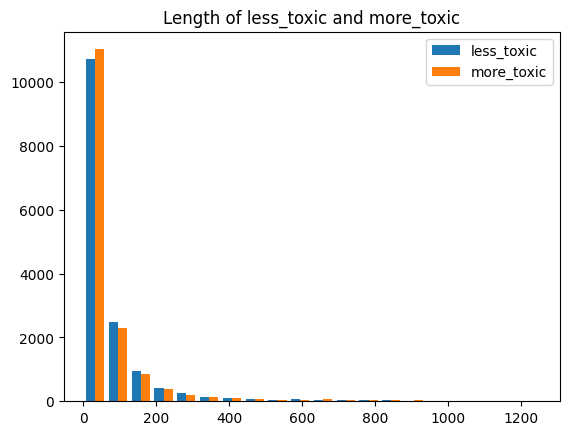

In [10]:
# Plotting length disrtibution
len_less_toxic = df_train['less_toxic'].apply(lambda x: len(x.split()))
len_more_toxic = df_train['more_toxic'].apply(lambda x: len(x.split()))

plt.hist((len_less_toxic, len_more_toxic), bins=20, label=('less_toxic', 'more_toxic'))
plt.legend(loc='upper right')
plt.title('Length of less_toxic and more_toxic')
plt.show()

In [11]:
# Saving
os.makedirs(PROCESSED_PATH, exist_ok=True)
df_train.to_csv(f'{PROCESSED_PATH}/train_data.csv', index=False)

In [12]:
# Remove stopwords for further profiling report
stop = stopwords.words('english')
df_train_no_stopwords = df_train.copy()
df_train_no_stopwords['less_toxic'] = df_train_no_stopwords['less_toxic'].apply(
    lambda x: ' '.join([word for word in gensim.utils.simple_preprocess(x, max_len=30) if word not in stop])
)
df_train_no_stopwords['more_toxic'] = df_train_no_stopwords['more_toxic'].apply(
    lambda x: ' '.join([word for word in gensim.utils.simple_preprocess(x, max_len=30) if word not in stop])
)

df_train_no_stopwords.head()

,less_toxic,more_toxic
0,article sucks woo woo wooooooo,wher sexy pic gone main page put back
1,yes people recognize usually one first objecti...,daphne guinness top mornin favourite alien lif...
2,western media yup every crime entire world cau...,atom believe actual photos masturbation sexual...
3,removed numbskull care say anymore life go ahe...,seem sand vagina might want wash stinking hole...
4,smelly vagina bluerasberry model cheesy blue v...,hey way support nazis racist


In [13]:
ProfileReport(df_train_no_stopwords)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### EDA test data

In [14]:
df_test = pd.read_csv(f'{RAW_PATH}/comments_to_score.csv')
df_test.head()

,comment_id,text
0,114890,"""\n \n\nGjalexei, you asked about whether ther..."
1,732895,"Looks like be have an abuser , can you please ..."
2,1139051,I confess to having complete (and apparently b...
3,1434512,"""\n\nFreud's ideas are certainly much discusse..."
4,2084821,It is not just you. This is a laundry list of ...


In [15]:
# Drop the comment_id column as it is not needed
df_test.drop('comment_id', axis=1, inplace=True)
df_test.head()

,text
0,"""\n \n\nGjalexei, you asked about whether ther..."
1,"Looks like be have an abuser , can you please ..."
2,I confess to having complete (and apparently b...
3,"""\n\nFreud's ideas are certainly much discusse..."
4,It is not just you. This is a laundry list of ...


In [16]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7537 entries, 0 to 7536
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    7537 non-null   object
dtypes: object(1)
memory usage: 59.0+ KB


In [17]:
df_test.describe(include='object')

,text
count,7537
unique,7537
top,"""\n \n\nGjalexei, you asked about whether ther..."
freq,1


In [18]:
# Check for duplicates
df_test.drop_duplicates(inplace=True)

In [19]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7537 entries, 0 to 7536
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    7537 non-null   object
dtypes: object(1)
memory usage: 59.0+ KB


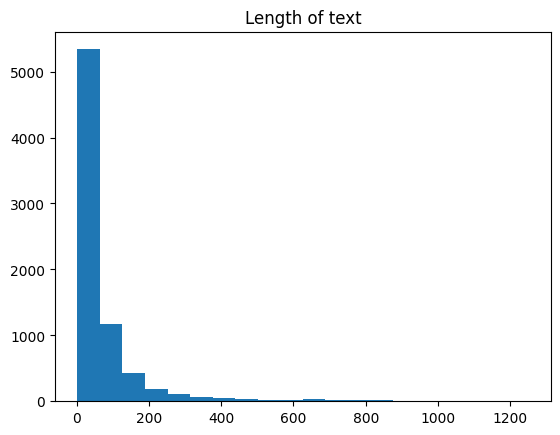

In [20]:
# Plotting length disrtibution
len_text = df_test['text'].apply(lambda x: len(x.split()))
plt.hist(len_text, bins=20)
plt.title('Length of text')
plt.show()

In [21]:
# Remove stopwords for further profiling report
df_test_no_stopwords = df_test.copy()
df_test_no_stopwords['text'] = df_test_no_stopwords['text'].apply(
    lambda x: ' '.join([word for word in gensim.utils.simple_preprocess(x, max_len=30) if word not in stop])
)

df_test_no_stopwords.head()

,text
0,gjalexei asked whether anti editorializing pol...
1,looks like abuser please look thanks
2,confess complete apparently blissful ignorance...
3,freud ideas certainly much discussed today wou...
4,laundry list stupid allegations scooped god kn...


In [22]:
ProfileReport(df_test_no_stopwords)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

##### Evaluation metric

Submissions are evaluated on Average Agreement with Annotators. For the ground truth, annotators were shown two comments and asked to identify which of the two was more toxic. Pairs of comments can be, and often are, rated by more than one annotator, and may have been ordered differently by different annotators.

For each of the approximately 200,000 pair ratings in the ground truth test data, we use your predicted toxicity score to rank the comment pair. The pair receives a 1 if this ranking matches the annotator ranking, or 0 if it does not match.

The final score is the average across all the pair evaluations.


So, basically, metric used by this competition is just an accuracy score.

#### Adversarial validation

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import xgboost as xgb
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
import seaborn as sns

In [24]:
# Dropping duplicates that we got from stop words removal
df_test_no_stopwords.drop_duplicates(inplace=True)

In [25]:
# Concatenating tless_toxic and more_toxic columns and assigning target 0
df_train_adversarial = pd.concat([df_train_no_stopwords['less_toxic'], df_train_no_stopwords['more_toxic']])
df_train_adversarial.drop_duplicates(inplace=True)
df_train_adversarial = pd.DataFrame(df_train_adversarial, columns=['text'])
df_train_adversarial['target'] = 0
df_train_adversarial

,text,target
0,article sucks woo woo wooooooo,0
1,yes people recognize usually one first objecti...,0
2,western media yup every crime entire world cau...,0
3,removed numbskull care say anymore life go ahe...,0
4,smelly vagina bluerasberry model cheesy blue v...,0
...,...,...
30042,hey fucking jew fuck get rid emo kid beatdown ...,0
30046,hate guts hope feel good,0
30052,fuck animal remember shit think coming warning...,0
30082,say little mothyer fukin bitchy,0


In [26]:
# Assigning target 1 to the test data
df_test_adversarial = df_test_no_stopwords.copy()
df_test_adversarial['target'] = 1
df_test_adversarial

,text,target
0,gjalexei asked whether anti editorializing pol...,1
1,looks like abuser please look thanks,1
2,confess complete apparently blissful ignorance...,1
3,freud ideas certainly much discussed today wou...,1
4,laundry list stupid allegations scooped god kn...,1
...,...,...
7532,go away annoying vandal,1
7533,user vandal,1
7534,sorry sound like pain one following tad stalki...,1
7535,well pretty fucking irrelevant unblocked aint,1


In [27]:
# Concatenating training and testing data
df_adversarial = pd.concat([df_train_adversarial, df_test_adversarial]).reset_index(drop=True)
df_adversarial

,text,target
0,article sucks woo woo wooooooo,0
1,yes people recognize usually one first objecti...,0
2,western media yup every crime entire world cau...,0
3,removed numbskull care say anymore life go ahe...,0
4,smelly vagina bluerasberry model cheesy blue v...,0
...,...,...
21656,go away annoying vandal,1
21657,user vandal,1
21658,sorry sound like pain one following tad stalki...,1
21659,well pretty fucking irrelevant unblocked aint,1


In [28]:
df_adversarial.duplicated().sum()

0

In [92]:
# Splitting the data, training the model and calculating ROC AUC
X_train, X_valid, y_train, y_valid = train_test_split(df_adversarial['text'], df_adversarial['target'], test_size=0.3, random_state=42, stratify=df_adversarial['target'])

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', xgb.XGBClassifier())
])


pipeline.fit(X_train, y_train)
y_pred = pipeline.predict_proba(X_valid)[:, 1]
roc_auc_score(y_valid, y_pred)

0.2860983596686597

              precision    recall  f1-score   support

           0       0.64      0.92      0.75      4246
           1       0.04      0.01      0.01      2253

    accuracy                           0.60      6499
   macro avg       0.34      0.46      0.38      6499
weighted avg       0.43      0.60      0.49      6499



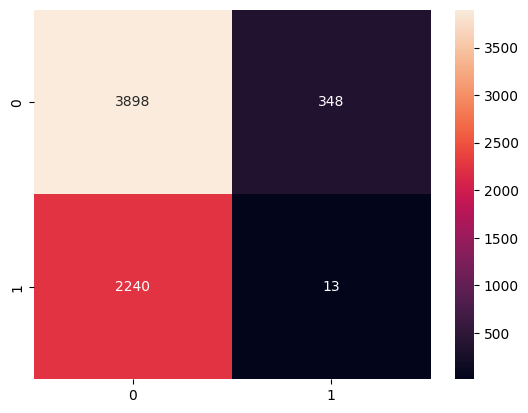

In [93]:
# Checking confusion matrix and classification report
y_pred = pipeline.predict(X_valid)
print(classification_report(y_valid, y_pred))
sns.heatmap(confusion_matrix(y_valid, y_pred), annot=True, fmt='d')
plt.show()

#### Adversarial validation using BERT

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader
from transformers import AdamW

# Splitting the data
X_train, X_valid, y_train, y_valid = train_test_split(df_adversarial['text'], df_adversarial['target'], test_size=0.3, random_state=42, stratify=df_adversarial['target'])
X_train = X_train.reset_index(drop=True)
X_valid = X_valid.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_valid = y_valid.reset_index(drop=True)

In [62]:
class JigsawDataset(Dataset):
    def __init__(self, texts, targets, tokenizer, max_len):
        self.texts = texts
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, item):
        text = str(self.texts[item])
        target = self.targets[item]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True
        )

        return {
            'text': text,
            'input_ids': torch.tensor(encoding['input_ids'], dtype=torch.long),
            'attention_mask': torch.tensor(encoding['attention_mask'], dtype=torch.long),
            'label': torch.tensor(target, dtype=torch.long)
        }

In [63]:
# Tokenizing the data
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

train_dataset = JigsawDataset(
    texts=X_train,
    targets=y_train,
    tokenizer=tokenizer,
    max_len=128
)
valid_dataset = JigsawDataset(
    texts=X_valid,
    targets=y_valid,
    tokenizer=tokenizer,
    max_len=128
)

In [64]:
# Training the model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=8, shuffle=False)

DISABLE_MLFLOW_INTEGRATION = True 
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=1,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    weight_decay=0.01,
    logging_strategy='no',
    save_strategy='no',
    eval_strategy='epoch',
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
)

trainer.train()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,No log,0.645672


TrainOutput(global_step=948, training_loss=0.6521007682703719, metrics={'train_runtime': 120.6903, 'train_samples_per_second': 125.627, 'train_steps_per_second': 7.855, 'total_flos': 997322455342080.0, 'train_loss': 0.6521007682703719, 'epoch': 1.0})

In [67]:
# Predicting the target
pred = trainer.predict(valid_dataset)
preds = pred.predictions
preds = torch.nn.functional.softmax(torch.from_numpy(preds), dim=1)
preds = preds.numpy()
roc_auc_score(y_valid, preds[:, 1])

0.4833400026217203

              precision    recall  f1-score   support

           0       0.65      1.00      0.79      4246
           1       0.00      0.00      0.00      2253

    accuracy                           0.65      6499
   macro avg       0.33      0.50      0.40      6499
weighted avg       0.43      0.65      0.52      6499



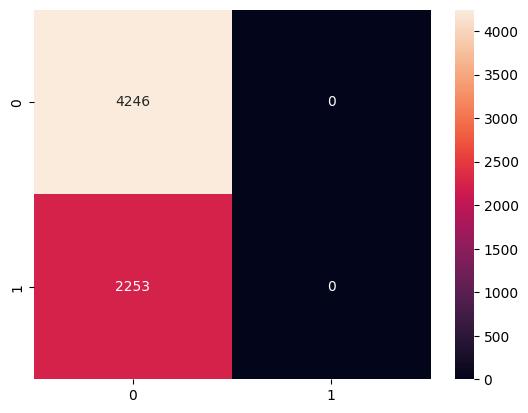

In [71]:
y_pred = np.argmax(preds, axis=1)
print(classification_report(y_valid, y_pred, zero_division=0))
sns.heatmap(confusion_matrix(y_valid, y_pred), annot=True, fmt='d')
plt.show()

Considering the roc auc score of 0.483, we can say that the train and test data are similar.